In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/Users/delinaivanova/Library/CloudStorage/OneDrive-Personal/UoT/Micro Courses/Python For Data Science/customers_and_transactions.csv')

In [3]:
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34


In [ ]:
# how to make calculations between columns?
# how to create a new column
# applying custom functions using apply() and map()
# a few more examples of groupby()

In [6]:
# how to calculate anything between columns?
# average transaction amount by the number of products a customer has?
df['avg_txn_amt_per_product'] = df['txn_total'] / df['num_products']

In [8]:
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total,avg_txn_amt_per_product
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78,55.260000
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10,14.033333
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03,34.343333
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60,18.866667
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34,53.585000


In [9]:
# multiply the transaction total by 2 and store in a new column

df['double_txn_total'] = (2 * df['txn_total']).round(2)

In [10]:
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total,avg_txn_amt_per_product,double_txn_total
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78,55.260000,331.56
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10,14.033333,84.20
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03,34.343333,206.06
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60,18.866667,113.20
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34,53.585000,428.68


In [11]:
df.columns

Index(['customer_id', 'cust_name', 'num_products', 'province',
       'len_relationship', 'cust_category', 'txn_id', 'txn_type', 'txn_total',
       'avg_txn_amt_per_product', 'double_txn_total'],
      dtype='object')

In [12]:
# changing the order -- list all the columns you want in the order you want

df = df[['customer_id', 'cust_name', 'num_products', 'province',
       'len_relationship', 'cust_category', 'txn_id', 'txn_type', 'txn_total', 'double_txn_total',
       'avg_txn_amt_per_product']]

In [14]:
# what if you have a situation where you want to apply a custom mapping? IF/ELSE statement for example
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total,double_txn_total,avg_txn_amt_per_product
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78,331.56,55.260000
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10,84.20,14.033333
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03,206.06,34.343333
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60,113.20,18.866667
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34,428.68,53.585000


In [23]:
# in order to apply a custom mapping or transformation to a column, we need a custom function

def avg_txn_bucket(x):
    if x > 0 and x <= 10:
        return 'Low Value Transactions'
    elif x > 10 and x <= 30:
        return 'Mid Value Transactions'
    else:
        return 'High Value Transactions'

In [24]:
df['Transaction_Bucket'] = df['avg_txn_amt_per_product'].apply(avg_txn_bucket)

/var/folders/m2/nm8j21f569jbcxgbvmghx5gh0000gn/T/ipykernel_35866/1733253127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction_Bucket'] = df['avg_txn_amt_per_product'].apply(avg_txn_bucket)


In [26]:
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total,double_txn_total,avg_txn_amt_per_product,Transaction_Bucket
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78,331.56,55.260000,High Value Transactions
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10,84.20,14.033333,Mid Value Transactions
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03,206.06,34.343333,High Value Transactions
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60,113.20,18.866667,Mid Value Transactions
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34,428.68,53.585000,High Value Transactions


In [36]:
# identify customers who are high value based on relationship, basically customers with more than 5 years are high value
df['Customer_Value'] = df['len_relationship'].apply(lambda x: 'HVL' if x > 5 else np.nan)

/var/folders/m2/nm8j21f569jbcxgbvmghx5gh0000gn/T/ipykernel_35866/1511239032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_Value'] = df['len_relationship'].apply(lambda x: 'HVL' if x > 5 else np.nan)


In [40]:
# what is a good definition?
# create a custom function that would identify customers who are high value, that can take more than 1 column into consideration

def HVL(transaction_bucket, cust_category):
    if transaction_bucket == 'High Value Transactions' and (cust_category == 'wealth' or cust_category == 'hnw'):
        return 'HVC'
    else:
        return 'LVC'


In [44]:
df['Customer_Value'] = df.apply(lambda x: HVL(x['Transaction_Bucket'], x['cust_category']), axis=1)

/var/folders/m2/nm8j21f569jbcxgbvmghx5gh0000gn/T/ipykernel_35866/3293734533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_Value'] = df.apply(lambda x: HVL(x['Transaction_Bucket'], x['cust_category']), axis=1)


In [42]:
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total,double_txn_total,avg_txn_amt_per_product,Transaction_Bucket,Customer_Value
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78,331.56,55.260000,High Value Transactions,HVC
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10,84.20,14.033333,Mid Value Transactions,LVC
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03,206.06,34.343333,High Value Transactions,HVC
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60,113.20,18.866667,Mid Value Transactions,LVC
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34,428.68,53.585000,High Value Transactions,LVC


In [47]:
mapping_avg_transaction_amt = dict(df.groupby('customer_id')['txn_total'].mean())

In [50]:
mapping_avg_transaction_amt

{1001: 91.8775,
 1002: 117.13333333333333,
 1004: 116.75,
 1005: 267.23,
 1006: 225.89,
 1008: 199.73000000000002,
 1014: 233.47666666666666,
 1101: nan,
 1254: 168.75333333333333,
 1285: 270.4666666666667,
 1354: 303.29,
 1475: 227.4666666666667,
 1585: 286.18333333333334}

In [48]:
df['avg_txn_amt_per_cust'] = df['customer_id'].map(mapping_avg_transaction_amt)

/var/folders/m2/nm8j21f569jbcxgbvmghx5gh0000gn/T/ipykernel_35866/1544839883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_txn_amt_per_cust'] = df['customer_id'].map(mapping_avg_transaction_amt)


In [51]:
def HVL(avg_txn_amt_per_cust, cust_category):
    if avg_txn_amt_per_cust > 50 and (cust_category == 'wealth' or cust_category == 'hnw'):
        return 'HVC'
    else:
        return 'LVC'

In [52]:
df['Customer_Value'] = df.apply(lambda x: HVL(x['avg_txn_amt_per_cust'], x['cust_category']), axis=1)

/var/folders/m2/nm8j21f569jbcxgbvmghx5gh0000gn/T/ipykernel_35866/274216984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_Value'] = df.apply(lambda x: HVL(x['avg_txn_amt_per_cust'], x['cust_category']), axis=1)


In [54]:
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total,double_txn_total,avg_txn_amt_per_product,Transaction_Bucket,Customer_Value,avg_txn_amt_per_cust
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78,331.56,55.260000,High Value Transactions,HVC,91.877500
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10,84.20,14.033333,Mid Value Transactions,HVC,91.877500
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03,206.06,34.343333,High Value Transactions,HVC,91.877500
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60,113.20,18.866667,Mid Value Transactions,HVC,91.877500
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34,428.68,53.585000,High Value Transactions,LVC,117.133333


In [58]:
dict1 = {'Debit':'Visa Debit'}

In [59]:
df['txn_type2'] = df['txn_type'].map(dict1)

/var/folders/m2/nm8j21f569jbcxgbvmghx5gh0000gn/T/ipykernel_35866/3290928166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['txn_type2'] = df['txn_type'].map(dict1)


In [60]:
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total,double_txn_total,avg_txn_amt_per_product,Transaction_Bucket,Customer_Value,avg_txn_amt_per_cust,txn_type2
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78,331.56,55.260000,High Value Transactions,HVC,91.877500,Visa Debit
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10,84.20,14.033333,Mid Value Transactions,HVC,91.877500,NaN
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03,206.06,34.343333,High Value Transactions,HVC,91.877500,NaN
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60,113.20,18.866667,Mid Value Transactions,HVC,91.877500,NaN
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34,428.68,53.585000,High Value Transactions,LVC,117.133333,Visa Debit


In [61]:
# calculating a single value and putting it in a new column will populate the entire column
df['avg_txn_amnt_all'] = df['txn_total'].mean()

/var/folders/m2/nm8j21f569jbcxgbvmghx5gh0000gn/T/ipykernel_35866/438562396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_txn_amnt_all'] = df['txn_total'].mean()


In [63]:
def HVL(avg_txn_amt_per_cust, avg_txn_amnt_all, cust_category):
    if avg_txn_amt_per_cust > avg_txn_amnt_all and (cust_category == 'wealth' or cust_category == 'hnw'):
        return 'HVC'
    else:
        return 'LVC'

In [65]:
df['Customer_Value'] = df.apply(lambda x: HVL(x['avg_txn_amt_per_cust'],x['avg_txn_amnt_all'], x['cust_category']), axis=1)

/var/folders/m2/nm8j21f569jbcxgbvmghx5gh0000gn/T/ipykernel_35866/20801559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_Value'] = df.apply(lambda x: HVL(x['avg_txn_amt_per_cust'],x['avg_txn_amnt_all'], x['cust_category']), axis=1)


In [67]:
df.head()

,customer_id,cust_name,num_products,province,len_relationship,cust_category,txn_id,txn_type,txn_total,double_txn_total,avg_txn_amt_per_product,Transaction_Bucket,Customer_Value,avg_txn_amt_per_cust,txn_type2,avg_txn_amnt_all
0,1001,Johnny Awesome,3,ON,1,wealth,1.0,Debit,165.78,331.56,55.260000,High Value Transactions,LVC,91.877500,Visa Debit,207.296765
1,1001,Johnny Awesome,3,ON,1,wealth,2.0,Credit,42.10,84.20,14.033333,Mid Value Transactions,LVC,91.877500,NaN,207.296765
2,1001,Johnny Awesome,3,ON,1,wealth,4.0,Credit,103.03,206.06,34.343333,High Value Transactions,LVC,91.877500,NaN,207.296765
3,1001,Johnny Awesome,3,ON,1,wealth,5.0,Credit,56.60,113.20,18.866667,Mid Value Transactions,LVC,91.877500,NaN,207.296765
4,1002,Bob Marley,4,ON,1,personal_banking,6.0,Debit,214.34,428.68,53.585000,High Value Transactions,LVC,117.133333,Visa Debit,207.296765


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Total Txn Amount by Bucket'}, xlabel='Transaction_Bucket', ylabel='txn_amount'>

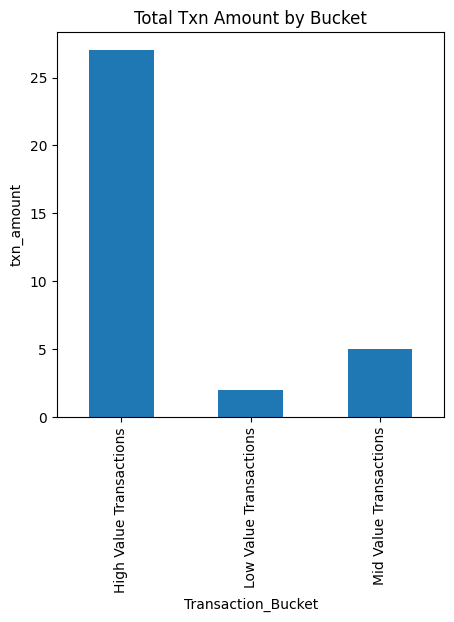

In [82]:
# pandas plot
df.groupby('Transaction_Bucket')['txn_total'].count().plot(kind='bar', title='Total Txn Amount by Bucket', figsize=(5,5), ylabel='txn_amount')

In [90]:
df.groupby('Transaction_Bucket')['txn_total'].count()

Transaction_Bucket
High Value Transactions    27
Low Value Transactions      2
Mid Value Transactions      5
Name: txn_total, dtype: int64

In [96]:
df.groupby('Transaction_Bucket')['txn_total'].count().index

Index(['High Value Transactions', 'Low Value Transactions',
       'Mid Value Transactions'],
      dtype='object', name='Transaction_Bucket')

Text(0, 0.5, 'txn amount')

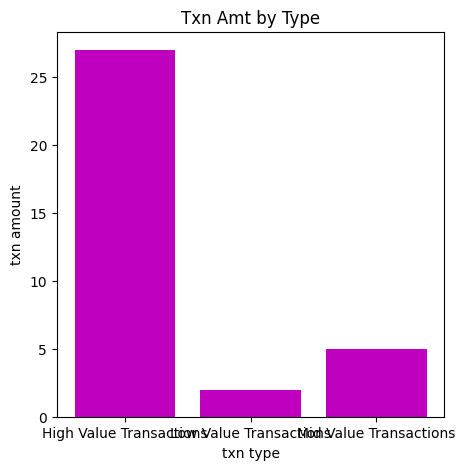

In [99]:
plt.figure(figsize=(5,5))
plt.bar(df.groupby('Transaction_Bucket')['txn_total'].count().index,df.groupby('Transaction_Bucket')['txn_total'].count(), color='m')
plt.title('Txn Amt by Type')
plt.xlabel('txn type')
plt.ylabel('txn amount')

<BarContainer object of 35 artists>

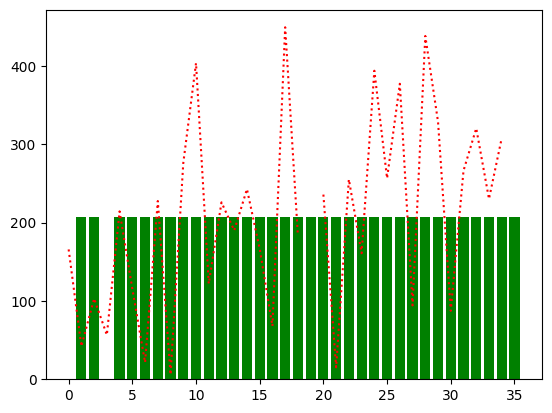

In [113]:
plt.plot(df.txn_total, 'r:')
plt.bar(df.txn_id, df['avg_txn_amnt_all'], color = 'g')
plt.savefig('/filename.jpg')


<Axes: xlabel='txn_type', ylabel='txn_total'>

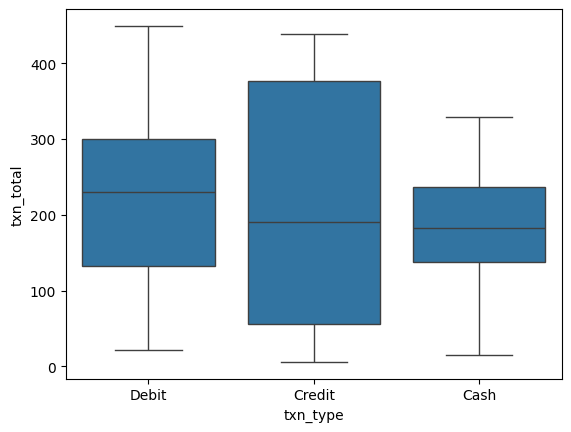

In [114]:
# is the disribution of transaction amounts different between debit and credit transactions?
sns.boxplot(x='txn_type', y='txn_total', data=df)

In [115]:
df.columns

Index(['customer_id', 'cust_name', 'num_products', 'province',
       'len_relationship', 'cust_category', 'txn_id', 'txn_type', 'txn_total',
       'double_txn_total', 'avg_txn_amt_per_product', 'Transaction_Bucket',
       'Customer_Value', 'avg_txn_amt_per_cust', 'txn_type2',
       'avg_txn_amnt_all'],
      dtype='object')

<Axes: xlabel='Customer_Value', ylabel='txn_total'>

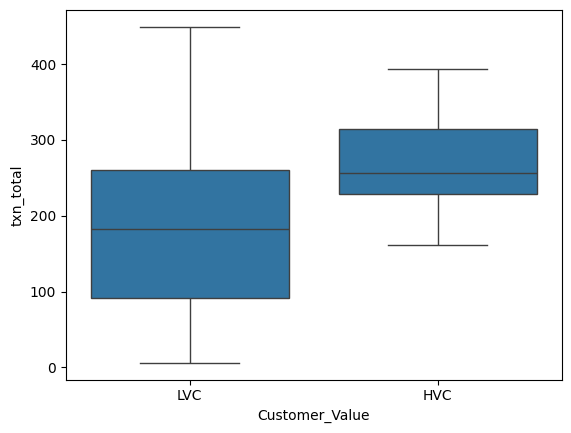

In [116]:
sns.boxplot(x='Customer_Value', y='txn_total', data=df)

<Axes: xlabel='txn_total', ylabel='avg_txn_amt_per_cust'>

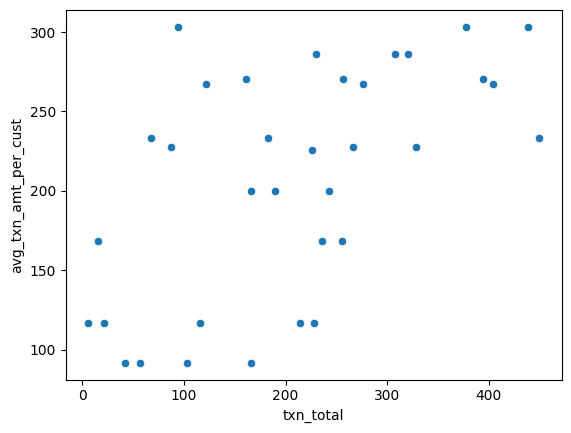

In [118]:
sns.scatterplot(x=df['txn_total'], y=df['avg_txn_amt_per_cust'])

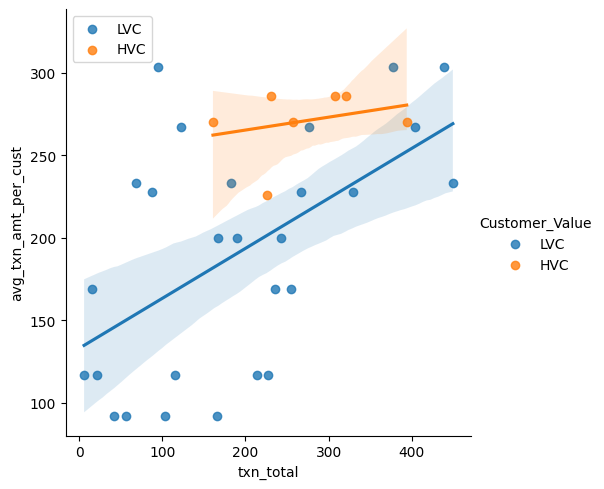

In [126]:
sns.lmplot(x='txn_total', y='avg_txn_amt_per_cust', data=df, hue='Customer_Value')
plt.legend(loc=2)

<Axes: xlabel='txn_total', ylabel='avg_txn_amt_per_cust'>

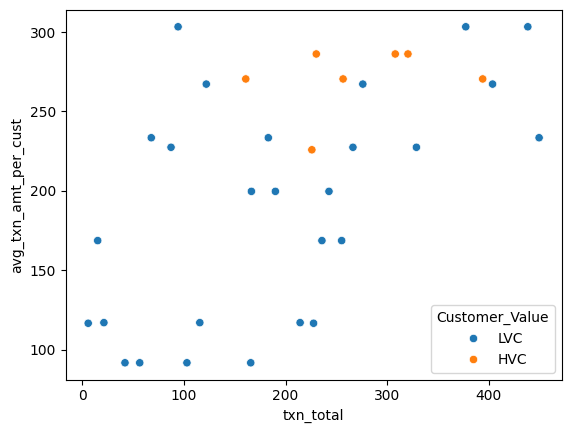

In [122]:
sns.scatterplot(x='txn_total', y='avg_txn_amt_per_cust', data=df, hue='Customer_Value')

<Axes: xlabel='txn_total', ylabel='Count'>

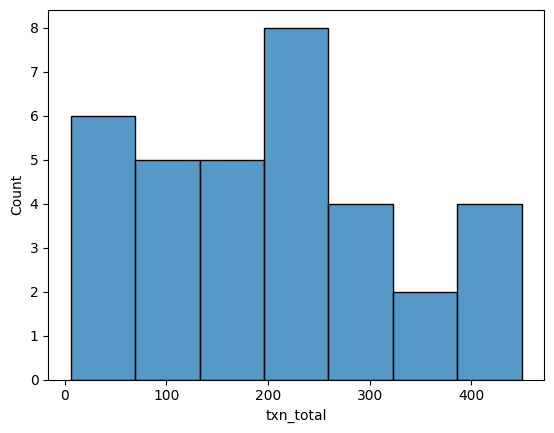

In [127]:
sns.histplot(df['txn_total'])

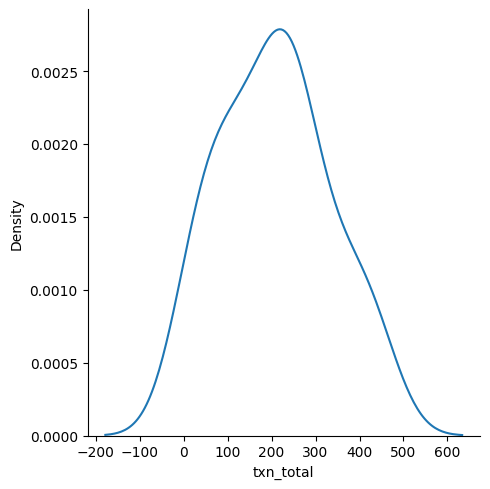

In [129]:
sns.displot(df['txn_total'], kind='kde')